In [1]:
#pip install pandas

In [2]:
#pip install scikit-learn

In [3]:
#pip install seaborn

In [4]:
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Cargar el titanic con sklearn

# Con pandas

In [5]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Mostrar las columnas sin datos

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   float64
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   float64
 6   parch       1309 non-null   float64
 7   ticket      1309 non-null   object 
 8   fare        1308 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 143.3+ KB


In [7]:
titanic.isnull().sum()

Unnamed: 0       0
pclass           0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

<AxesSubplot:title={'center':'Missing values in percentage'}, ylabel='percentage'>

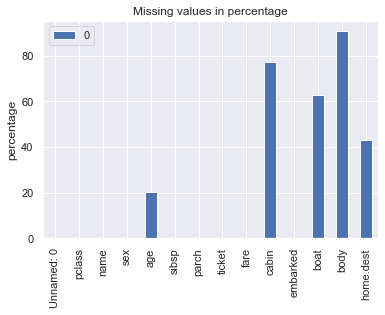

In [8]:
# Visusalización de los datos
sns.set()
miss_vals = pd.DataFrame(titanic.isnull().sum()/ len(titanic)*100)
miss_vals.plot(kind="bar",
title="Missing values in percentage",
ylabel="percentage")

# Procedimiento para valores nulos
Existen dos maneras:
Eliminar la columna
Asignamos a los valores la media, mediana, moda, etc
Eliminación
Eliminamos los valores nulos:

In [13]:
print(f"Size of the dataset: {titanic.shape}")
#titanic.drop(["cabin", "boat", "body", "home.dest"], axis=1, inplace=True)
titanic.dropna(inplace=True)
print(f"Size of the dataset: {titanic.shape}")

Size of the dataset: (1309, 14)
Size of the dataset: (0, 14)


Sustitución
Sustituir por el valor más común (media):

In [14]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#df.head()

In [16]:
#esto es porque no me deja con SCKEARN
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
print(f"Número de valores nulos de la columna edad: {titanic.age.isnull().sum()}")

Número de valores nulos de la columna edad: 263


In [18]:
titanic["age"].fillna(titanic["age"].mean(), inplace=True)
print(f"Número de valores nulos de la columna edad: {titanic.age.isnull().sum()}")

Número de valores nulos de la columna edad: 0


Otra opción: Simple transformación con Sklearn

In [34]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#df.head()

In [28]:
#esto es porque no me deja con SCKEAR
df = pd.read_csv("Titanic.csv")
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [29]:
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 263


In [30]:
imp = SimpleImputer(strategy="mean")
df["age"] = imp.fit_transform(df[["age"]])
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 0


In [31]:
print("Tipos de datos con valores Nulos:")
for col in titanic.columns[df.isnull().any()]:
    print(col, titanic[col][df[col].isnull()].values[0])

Tipos de datos con valores Nulos:
fare nan
cabin nan
embarked nan
boat nan
body nan
home.dest nan


Modificamos los None:

In [32]:
imp = SimpleImputer(missing_values=None, strategy="most_frequent")
df["cabin"] = imp.fit_transform(df[["cabin"]])
print(f"Número de valores nulos de la columna cabina: {df.cabin.isnull().sum()}")

ValueError: Input contains NaN

In [35]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == "float64" or df[col].dtype == "int64" or df[col].dtype == "int32":
            strategy = "mean"
        else:
            strategy = "most_frequent"
            missing_values = df[col][df[col].isnull()].values[0]
            parameters[col] = {"missing_values": missing_values, "strategy": strategy}
    return parameters
get_parameters(df)

{'cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [ ]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#df.head()

In [36]:
#esto es porque no me deja con SCKEARN
df = pd.read_csv("Titanic.csv")
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [38]:
parameters = get_parameters(df)
for col, param in parameters.items():
    missing_values = param["missing_values"]
    strategy = param["strategy"]
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    df[col] = imp.fit_transform(df[[col]])
    df.isnull().sum()

In [51]:
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Crear nuevas características (Feature Engineering)

# Sibsp: pasajeros que viajan con hermanos
Parch: viajeros que viajan con niños
Calculamos el número de pasajeros que viajan solos:

In [43]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#df.head()

In [39]:
#esto es porque no me deja con SCKEARN
df = pd.read_csv("Titanic.csv")
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:title={'center':'Passenger travelled alone?'}>

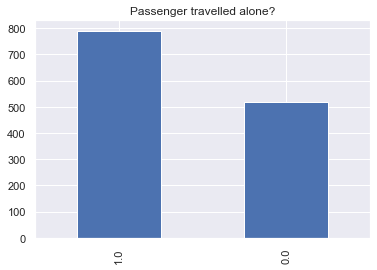

In [40]:
df["family"] = df["sibsp"] + df["parch"]
df.loc[df["family"] > 0, "travelled_alone"] = 0
df.loc[df["family"] == 0, "travelled_alone"] = 1
df["travelled_alone"].value_counts().plot(title="Passenger travelled alone?", kind="bar")

# Encode categorical features
scikit-learn: OneHotEncoder()
pandas: get_dummies()

In [ ]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#df.head()

In [41]:
#esto es porque no me deja con SCKEARN
df = pd.read_csv("Titanic.csv")
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
df[["female", "male"]] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[["sex", "female", "male"]]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


Eliminaremos uno de las columnas para evitar la colinealidad

In [43]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#esto es porque no me deja con SCKEARN
df = pd.read_csv("Titanic.csv")
df.head()
df["sex"] = OneHotEncoder().fit_transform(df[['sex']]).toarray()[:, 1]
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Pandas

In [57]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#esto es porque no me deja con SCKEARN
pd.read_csv("Titanic.csv")

df["sex"] = pd.get_dummies(df["sex"], drop_first=True)
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Encoding all categorical features

In [58]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#esto es porque no me deja con SCKEARN
df =pd.read_csv("Titanic.csv")

cat_cols = df.select_dtypes(include=["category"]).columns
print(f"Columnas Categoricas: {cat_cols}")

Columnas Categoricas: Index([], dtype='object')


In [59]:
for col in cat_cols:
    fill_value = df[col].mode()[0]
    df[col].fillna(fill_value, inplace=True)
    append_to = list(df[col].unique())
    print(append_to)
    df[append_to] = OneHotEncoder().fit_transform(df[[col]]).toarray()
    df.drop(col, axis=1, inplace=True)
    df.drop(append_to[0], axis=1, inplace=True)
    print(df.columns)
    df[["male", "C", "Q"]].head()

In [60]:
df.head()

,Unnamed: 0,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# MinMaxScaler
MinMaxScaler() pone todos los valores númericos de 0 a 1:

In [61]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
#esto es porque no me deja con SCKEARN
df = pd.read_csv("Titanic.csv")

num_cols = df.select_dtypes(include=["int64", "int32", "float64"]).columns
print(num_cols)

Index(['Unnamed: 0', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')


In [63]:
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
    minmax = MinMaxScaler()
    df[num_cols] = minmax.fit_transform(df[num_cols])
    df[num_cols]

# StandardScaler
StandardScaler() poner todos los valores tengan una media de 0 y de desviación de 1

In [64]:
#df = fetch_openml("titanic", version=1, as_frame=True)["data"]
num_cols = df.select_dtypes(include=["int64", "int32", "float64"]).columns
print(num_cols)

Index(['Unnamed: 0', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')


In [65]:
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
    ss = StandardScaler()
    df[num_cols] = ss.fit_transform(df[num_cols])
    df[num_cols].head()

In [66]:
df[num_cols].describe()

,Unnamed: 0,pclass,age,sibsp,parch,fare,body
count,1309.000000,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1309.000000,1.309000e+03
mean,0.000000,1.737003e-16,0.000000e+00,1.085627e-17,-1.899847e-17,0.000000,-1.357033e-18
std,1.000382,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382,1.000382e+00
min,-1.730728,-1.546098e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-0.643775,-5.402590e+00
25%,-0.865364,-3.520907e-01,-6.119712e-01,-4.790868e-01,-4.449995e-01,-0.491108,-6.134524e-17
50%,0.000000,8.419164e-01,1.302752e-16,-4.790868e-01,-4.449995e-01,-0.364300,-6.134524e-17
75%,0.865364,8.419164e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-0.039066,-6.134524e-17
max,1.730728,8.419164e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219,5.652087e+00


Usando el método de describe() podemos ver la media y la desvicación estandar de las columnas escaladas.
La media no parece ser igual a 0 pero, de hecho 4.342507e-17 es igual 0,000000000000000043425. Esto es tan cercano a 0 que puede
considerarse igual a 0. Lo mismo ocurre con la desviación estándar que es tan cercana a 1 que puede considerarse igual a 1.